Temperatura óptima: 30.00 °C
Tiempo óptimo de batido: 40.00 minutos
Rendimiento máximo esperado: 0.80


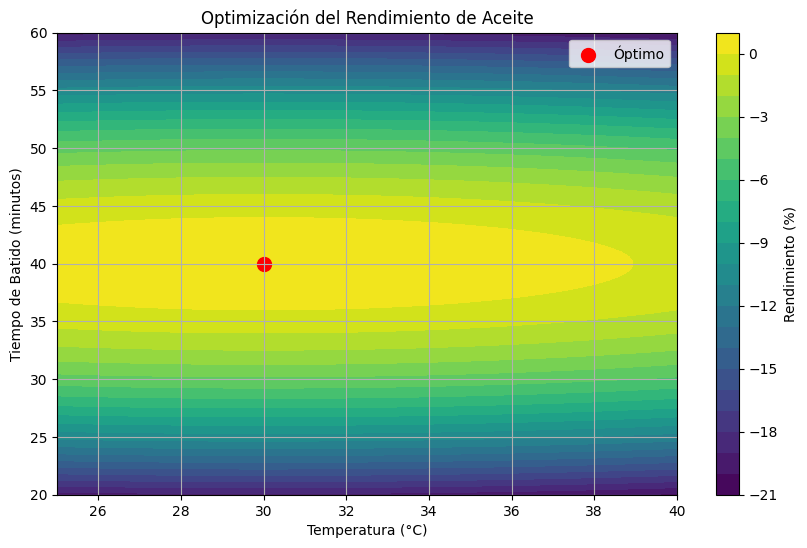

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Función objetivo: Modelo del rendimiento de extracción del aceite
def rendimiento(params):
    """
    Modelo simplificado para predecir el rendimiento en función de
    la temperatura (T) y el tiempo de batido (t).
    """
    T, t = params  # Parámetros: Temperatura y Tiempo
    # Modelo basado en datos experimentales simplificados
    rendimiento = -0.01 * (T - 30)**2 - 0.05 * (t - 40)**2 + 0.8
    return -rendimiento  # Negativo porque queremos maximizar

# Límites de los parámetros
bounds = [(25, 40),  # Rango para la temperatura (T)
          (20, 60)]  # Rango para el tiempo de batido (t)

# Condiciones iniciales
initial_guess = [30, 40]

# Optimización
resultado = minimize(rendimiento, initial_guess, bounds=bounds, method='L-BFGS-B')

# Resultados
opt_temp, opt_time = resultado.x
max_rendimiento = -resultado.fun

print(f"Temperatura óptima: {opt_temp:.2f} °C")
print(f"Tiempo óptimo de batido: {opt_time:.2f} minutos")
print(f"Rendimiento máximo esperado: {max_rendimiento:.2f}")

# Visualización del modelo
temp_range = np.linspace(25, 40, 100)
time_range = np.linspace(20, 60, 100)
temp_grid, time_grid = np.meshgrid(temp_range, time_range)

# Calcular el rendimiento en cada punto de la malla
rend_grid = -0.01 * (temp_grid - 30)**2 - 0.05 * (time_grid - 40)**2 + 0.8

# Graficar superficie de rendimiento
plt.figure(figsize=(10, 6))
contour = plt.contourf(temp_grid, time_grid, rend_grid, cmap='viridis', levels=20)
plt.colorbar(contour, label='Rendimiento (%)')
plt.scatter(opt_temp, opt_time, color='red', label='Óptimo', s=100)
plt.title("Optimización del Rendimiento de Aceite")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Tiempo de Batido (minutos)")
plt.legend()
plt.grid(True)
plt.show()
